In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import glob
import random
import config
conf = config.Config()

In [5]:
data_map = []
for sub_dir_path in glob.glob(os.path.join(conf.KAGGLE_3M_DATASET_DIR,"*")):
    try:
        dir_name = os.path.basename(sub_dir_path)
        for filename in os.listdir(sub_dir_path):
            image_path = os.path.join(sub_dir_path , filename)
            data_map.extend([dir_name, image_path])
    except Exception as e:
        print(e)

        
        
df = pd.DataFrame({"patient_id" : data_map[::2],
                   "path" : data_map[1::2]})



df_MR_images = df[~df['path'].str.contains("mask")]
df_masks = df[df['path'].str.contains("mask")]


# File path line length for later sorting
BASE_LEN =len(os.path.basename(df_MR_images["path"].values[0]))
END_IMG_LEN = 4 # len(.tif)
END_MASK_LEN = 9 # (_mask.tif)

# Data sorting

imgs = sorted(df_MR_images["path"].values, key=lambda x : x[BASE_LEN:-END_IMG_LEN])
masks = sorted(df_masks["path"].values, key=lambda x : x[BASE_LEN:-END_MASK_LEN])



# Final Data
brain_df = pd.DataFrame({
                         "image_path": imgs,
                         "mask_path": masks
                        })
def pos_neg_diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path))
    if value > 0 : 
        return 1
    else:
        return 0
    
brain_df['mask'] = brain_df['mask_path'].apply(lambda x: pos_neg_diagnosis(x))

brain_df.head()

[Errno 20] Not a directory: '/root/test01/src/data/lgg-mri-segmentation/kaggle_3m/README.md'
[Errno 20] Not a directory: '/root/test01/src/data/lgg-mri-segmentation/kaggle_3m/data.csv'


,image_path,mask_path,mask
0,/root/test01/src/data/lgg-mri-segmentation/kag...,/root/test01/src/data/lgg-mri-segmentation/kag...,0
1,/root/test01/src/data/lgg-mri-segmentation/kag...,/root/test01/src/data/lgg-mri-segmentation/kag...,0
2,/root/test01/src/data/lgg-mri-segmentation/kag...,/root/test01/src/data/lgg-mri-segmentation/kag...,1
3,/root/test01/src/data/lgg-mri-segmentation/kag...,/root/test01/src/data/lgg-mri-segmentation/kag...,1
4,/root/test01/src/data/lgg-mri-segmentation/kag...,/root/test01/src/data/lgg-mri-segmentation/kag...,1


In [46]:
print(conf.KAGGLE_3M_DATASET_DIR)

/root/test01/src/data/lgg-mri-segmentation/kaggle_3m


In [44]:

# import the library and helpers
import imageio
import imgaug as ia
from imgaug import augmenters as iaa

image = imageio.imread(brain_df.image_path[444])
mask = imageio.imread(brain_df.mask_path[444])

# initialize the augmenters for demo
seq = iaa.Sequential([
    iaa.Affine(rotate=(-90, 90),
        scale={"x": (0.8, 1.2), "y": (0.5, 1.5)}, # rotate image
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}
        ),
    iaa.AdditiveGaussianNoise(scale=(0, 40)), # add gaussian noise
    iaa.Crop(percent=(0, 0.1)), # crop image
    iaa.AddToHueAndSaturation((-50, 50)),  # change their color
    iaa.LinearContrast((0.75, 1.5)), # strengthens or weakens the contrast
], random_order= True)

(256, 256, 3)


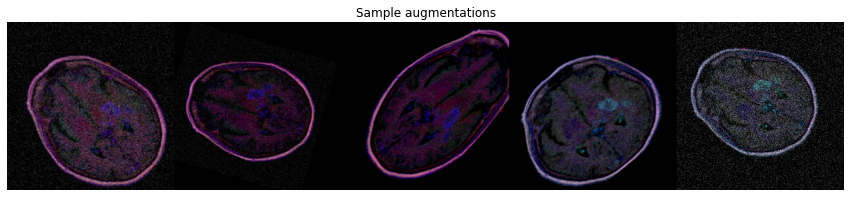

In [45]:
# get augmented images, create an array of augmented images for the demo
images_aug = [seq(image=image) for x in range(5)]

# plot augmentation examples
plt.figure(figsize=(15,5))
plt.axis('off')
plt.imshow(np.hstack(images_aug) )
plt.title('Sample augmentations')
print(image.shape)

(256, 256)


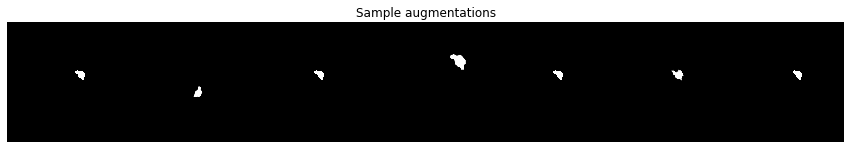

In [57]:
# get augmented images
image_rotated = rotate.augment_images([mask])
image_noise = gaussian_noise.augment_images([mask])
image_crop = crop.augment_images([mask])
image_hue = mask
image_trans = elastic_trans.augment_images([mask])
image_coarse = coarse_drop.augment_images([mask])

# create an array of augmented images for the demo
images_aug = [mask ,image_rotated[0], mask, image_crop[0], image_hue , image_trans[0], image_coarse[0]]

# plot augmentation examples
plt.figure(figsize=(15,5))
plt.axis('off')
plt.imshow(np.hstack(images_aug), cmap='gray')
plt.title('Sample augmentations')